<a href="https://www.kaggle.com/code/fakhrizalahadiat/eda-deep-dive-analysis-top-1000-imdb-movies?scriptVersionId=148972678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-1000-movies-dataset/IMDb top 1000 movies.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/imdb-top-1000-movies-dataset/IMDb top 1000 movies.csv")
df.head(3)

,Unnamed: 0,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,0,The Shawshank Redemption,R,142 min,Drama,9.3,82.0,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2807416,2807416,"Over the course of several years, two convicts..."
1,1,The Godfather,R,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",1956381,1956381,"Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,PG-13,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2789160,2789160,When the menace known as the Joker wreaks havo...


# General Information Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   Movie Name    1000 non-null   object 
 2   Certificate   985 non-null    object 
 3   Duration      1000 non-null   object 
 4   Genre         1000 non-null   object 
 5   IMDb Rating   1000 non-null   float64
 6   Metascore     845 non-null    float64
 7   Director      1000 non-null   object 
 8   Stars         1000 non-null   object 
 9   Votes         1000 non-null   int64  
 10  Grossed in $  1000 non-null   int64  
 11  Plot          1000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB


**Dataset Description**:

This dataset contains information about top 1000 IMDB movies, including their titles, certificates, durations, genres, IMDb ratings, Metascores, directors, cast members, the number of votes they received, grossed earnings, and plot summaries. The data is a curated list of highly acclaimed and popular movies.

1. Movie Name: The title of the movie.
2. Certificate: The certificate or rating assigned to the movie.
3. Duration: The duration of the movie in minutes.
4. Genre: The genre(s) to which the movie belongs.
5. IMDb Rating: The IMDb rating of the movie.
6. Metascore: The Metascore rating of the movie.
7. Director: The director of the movie.
8. Stars: The main cast members of the movie.
9. Votes: The number of user votes/ratings the movie has received.
10. Grossed in $: The gross earnings in dollars (if available).
11. Plot: A brief summary or plot description of the movie.
12. Size: The dataset contains 1000 rows and 11 columns.

In [5]:
print(f'Count of IMDB to 1000 Movies rows : {df.shape[0]}')
print(f'Count of IMDB to 1000 Movies columns : {df.shape[1]}')

Count of IMDB to 1000 Movies rows : 1000
Count of IMDB to 1000 Movies columns : 12


**Observation**

1. This dataset contains 1000 rows and 12 columns
2. There is an `unnamed:0` column which seems to be the index of the dataset and this column will be dropped later.
3. There are several star casts in 1 movie
4. There are multiple genres in 1 movie and will be separated into lists
5. The duration column is an object type that should be of type int

# Missing Values and Duplicated Checking

## Missing Values Checking

In [6]:
count = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending=False)
missing_values = pd.concat([count, percent], axis=1, keys=['count','percent'])
print(missing_values,'\n')
print('Total of Missing Values ', df.shape[0] - df.dropna().shape[0])
print('Total Percentage of Missing Values ', (df.shape[0] - df.dropna().shape[0])/df.shape[0]*100,'%')

              count  percent
Metascore       155     15.5
Certificate      15      1.5
Unnamed: 0        0      0.0
Movie Name        0      0.0
Duration          0      0.0
Genre             0      0.0
IMDb Rating       0      0.0
Director          0      0.0
Stars             0      0.0
Votes             0      0.0
Grossed in $      0      0.0
Plot              0      0.0 

Total of Missing Values  158
Total Percentage of Missing Values  15.8 %


## Duplicate Checking

In [7]:
print('Duplicated Values :', df.duplicated().sum())

Duplicated Values : 0


### Observation

1. There are missing values in the dataset, in the columns Metascore and Certificate by a total of 158 or 15.8%
2. There are no duplicate values
3. Because the missing value in the certificate column is only 1.5%, it will be dropped while the metascore column will be imputed using Mean of the metascore column.

# Data Cleaning

Drop the `Unnamed:0` column because this column is actually the index of the dataset

In [8]:
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.head(3)

,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,The Shawshank Redemption,R,142 min,Drama,9.3,82.0,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2807416,2807416,"Over the course of several years, two convicts..."
1,The Godfather,R,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",1956381,1956381,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2789160,2789160,When the menace known as the Joker wreaks havo...


## Impute Missing Values in Metascore Columns using Mean

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    1000 non-null   object 
 1   Certificate   985 non-null    object 
 2   Duration      1000 non-null   object 
 3   Genre         1000 non-null   object 
 4   IMDb Rating   1000 non-null   float64
 5   Metascore     845 non-null    float64
 6   Director      1000 non-null   object 
 7   Stars         1000 non-null   object 
 8   Votes         1000 non-null   int64  
 9   Grossed in $  1000 non-null   int64  
 10  Plot          1000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


In [10]:
df['Metascore'].fillna(df['Metascore'].mean(), inplace=True)

In [11]:
df['Metascore'].isna().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    1000 non-null   object 
 1   Certificate   985 non-null    object 
 2   Duration      1000 non-null   object 
 3   Genre         1000 non-null   object 
 4   IMDb Rating   1000 non-null   float64
 5   Metascore     1000 non-null   float64
 6   Director      1000 non-null   object 
 7   Stars         1000 non-null   object 
 8   Votes         1000 non-null   int64  
 9   Grossed in $  1000 non-null   int64  
 10  Plot          1000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


## Drop Missing Values in Certicate Columns

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 0 to 998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    985 non-null    object 
 1   Certificate   985 non-null    object 
 2   Duration      985 non-null    object 
 3   Genre         985 non-null    object 
 4   IMDb Rating   985 non-null    float64
 5   Metascore     985 non-null    float64
 6   Director      985 non-null    object 
 7   Stars         985 non-null    object 
 8   Votes         985 non-null    int64  
 9   Grossed in $  985 non-null    int64  
 10  Plot          985 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 92.3+ KB


**Observation**

After Impute and Drop Missing Value number of data becomes 985

## Convert Duration Column Type to Integer

In [15]:
df['Duration'] = df['Duration'].apply(lambda x:x.replace(' min', ''))
df['Duration'] = df['Duration'].astype('int64')

In [16]:
df.head(3)

,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,The Shawshank Redemption,R,142,Drama,9.3,82.0,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2807416,2807416,"Over the course of several years, two convicts..."
1,The Godfather,R,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",1956381,1956381,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2789160,2789160,When the menace known as the Joker wreaks havo...


## Separate Multiple Genre into List

In [17]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(', '))

In [18]:
df.head(3)

,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,The Shawshank Redemption,R,142,[Drama],9.3,82.0,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2807416,2807416,"Over the course of several years, two convicts..."
1,The Godfather,R,175,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",1956381,1956381,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152,"[Action, Crime, Drama]",9.0,84.0,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2789160,2789160,When the menace known as the Joker wreaks havo...


## Remove Special Character in Stars Column

In [19]:
def remove_character(stars):
    char_remove = ["'","/",'"',"[","]"]

    for char in char_remove:
        stars = stars.replace(char, '')
    return stars

In [20]:
df['Stars'] = df['Stars'].apply(lambda x: remove_character(x))
df.head(3)

,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,The Shawshank Redemption,R,142,[Drama],9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2807416,2807416,"Over the course of several years, two convicts..."
1,The Godfather,R,175,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1956381,1956381,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152,"[Action, Crime, Drama]",9.0,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2789160,2789160,When the menace known as the Joker wreaks havo...


## Separate Stars Cast into List

In [21]:
df['Stars'] = df['Stars'].apply(lambda x: x.split(', '))

**Observation**

1. After Impute and Drop Missing Value number of data becomes 985
2. The duration column is an object type so we convert it to an integer so we can analyze it further
3. In the Genre column there are several values, so here we separate them into a list so that we can see which genre the most movies are made in
4. There are special character strings in Stars column so we remove them
5. In the Stars column there are multiple values, so here we separate them into a list so that we can see in which Stars the movie appears the most

# Statistical Descriptive

## Separate Numeric and Categorical Columns

In [22]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns

## Value Count on each Categorical Data

In [23]:
for col in categorical:
    print(f'Total values in {col}')
    print('===================================================')
    print(df[col].value_counts(),'\n')

Total values in Movie Name
Movie Name
Beauty and the Beast               2
The Girl with the Dragon Tattoo    2
All Quiet on the Western Front     2
Drishyam                           2
Scarface                           2
                                  ..
Udaan                              1
Black                              1
Anand                              1
Sarfarosh                          1
Shine                              1
Name: count, Length: 980, dtype: int64 

Total values in Certificate
Certificate
R            356
Not Rated    183
PG-13        166
PG           141
Passed        47
G             38
Approved      30
TV-MA          7
TV-PG          4
TV-14          3
GP             3
16+            2
NC-17          2
18+            1
M/PG           1
Unrated        1
Name: count, dtype: int64 

Total values in Genre
Genre
[Drama]                         91
[Drama, Romance]                40
[Comedy, Drama]                 32
[Comedy, Drama, Romance]        32
[Crime

**Observation**
1. The number of unique values in the movie is 980
2. The number of unique values in certificate is 16
3. The number of unique values in genre is 194
4. The number of unique values in Director is 550
5. The number of unique values in Stars is 983
6. For the column plot, all of them are unique values

## Value Count on each Numerical Data¶

In [24]:
for col in numerical:
    print(f'Total values in {col}')
    print('===================================================')
    print(df[col].value_counts(),'\n')

Total values in Duration
Duration
130    23
102    21
100    21
129    20
122    19
       ..
205     1
173     1
201     1
195     1
71      1
Name: count, Length: 142, dtype: int64 

Total values in IMDb Rating
IMDb Rating
7.7    173
7.8    161
8.1    135
7.9    128
8.0    121
8.2     68
7.6     65
8.3     45
8.4     30
8.5     24
8.6     12
8.7      8
8.8      7
9.0      5
9.2      1
8.9      1
9.3      1
Name: count, dtype: int64 

Total values in Metascore
Metascore
79.071006    143
86.000000     37
76.000000     30
84.000000     29
82.000000     28
            ... 
33.000000      1
45.000000      1
46.000000      1
30.000000      1
28.000000      1
Name: count, Length: 61, dtype: int64 

Total values in Votes
Votes
2807416    1
140962     1
323806     1
28812      1
262209     1
          ..
46347      1
35658      1
34802      1
26479      1
55864      1
Name: count, Length: 985, dtype: int64 

Total values in Grossed in $
Grossed in $
2807416    1
140962     1
323806     1
2881

**Observation**
1. The number of unique values in Duration is 142
2. The number of unique values in IMDB Rating is 17
3. The number of unique values in Metascore is 61
4. For column Votes and Grossed , all of them are unique values

## Statistical Descriptive Categorical Columns

In [25]:
df[categorical].describe().T

,count,unique,top,freq
Movie Name,985,980,Beauty and the Beast,2
Certificate,985,16,R,356
Genre,985,194,[Drama],91
Director,985,550,Alfred Hitchcock,12
Stars,985,983,"[Prabhas, Rana Daggubati, Anushka Shetty, Tama...",2
Plot,985,985,"Over the course of several years, two convicts...",1


**Observation**
1. There are 2 movies with the same title, which is The Beauty and The Beast
2. In the categorical column, the most common type of certificates is R (Rated).
3. Most movies with drama genre
4. Most movie directors are Alfred Hitchcock with 12 movies

## Statistical Descriptive Numerical Columns

In [26]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,985.0,124.012183,28.686203,45.0,103.0,120.000000,138.0,321.0
IMDb Rating,985.0,7.968020,0.272862,7.6,7.8,7.900000,8.1,9.3
Metascore,985.0,79.041781,11.076324,28.0,73.0,79.071006,86.0,100.0
Votes,985.0,326224.755330,393273.407643,25616.0,63825.0,163662.000000,451582.0,2807416.0
Grossed in $,985.0,326224.755330,393273.407643,25616.0,63825.0,163662.000000,451582.0,2807416.0


**Observation**

1. It can be seen that the duration column tends to have a normal distribution because the mean and median are almost the same
2. IMDB Rating and Metascore are normally distributed.
3. Votes and Grossed distribution tend to skew to the right because the mean > median

# Univariate Analysis Categorical Columns

In [27]:
df.head(3)

,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,The Shawshank Redemption,R,142,[Drama],9.3,82.0,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2807416,2807416,"Over the course of several years, two convicts..."
1,The Godfather,R,175,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1956381,1956381,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152,"[Action, Crime, Drama]",9.0,84.0,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2789160,2789160,When the menace known as the Joker wreaks havo...


## Total Movies in Top 1000 IMDB Movies By Certificate

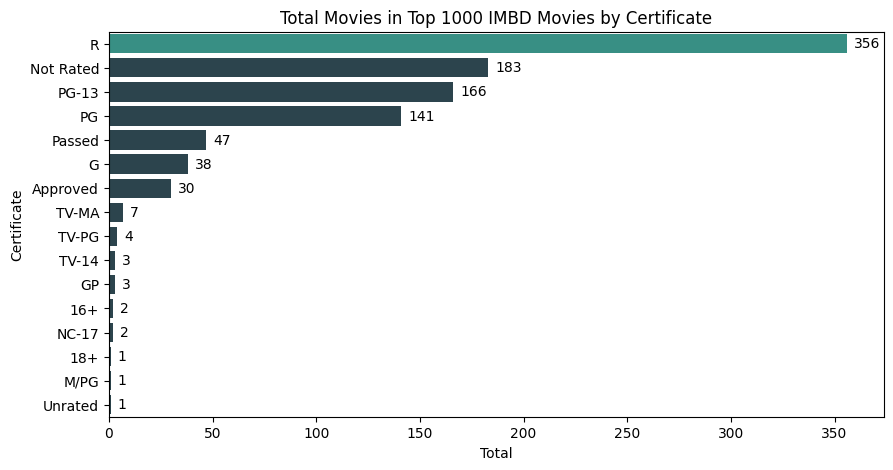

In [28]:
plt.figure(figsize=(10,5))
certificate = df['Certificate'].value_counts()
ax = sns.barplot(x = certificate.values, y = certificate.index, 
                 palette=np.where(certificate.values == np.max(certificate.values), '#2a9d8f','#264653'))
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlabel('Total')
plt.title('Total Movies in Top 1000 IMBD Movies by Certificate')
plt.show()

**Observation**

It can be seen that there are the most movies with **'R' (Rated)** certificate and then Not Rated, PG-13, PG and Passed.

## Genre in Top 1000 IMDB Movies

### Most Genres in Top 1000 IMDB Movies

In [29]:
all_genres = [genre for sublist in df['Genre'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()
genre_counts.index

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Adventure', 'Thriller',
       'Romance', 'Biography', 'Mystery', 'Animation', 'Sci-Fi', 'Fantasy',
       'Family', 'War', 'History', 'Horror', 'Music', 'Film-Noir', 'Western',
       'Musical', 'Sport'],
      dtype='object')

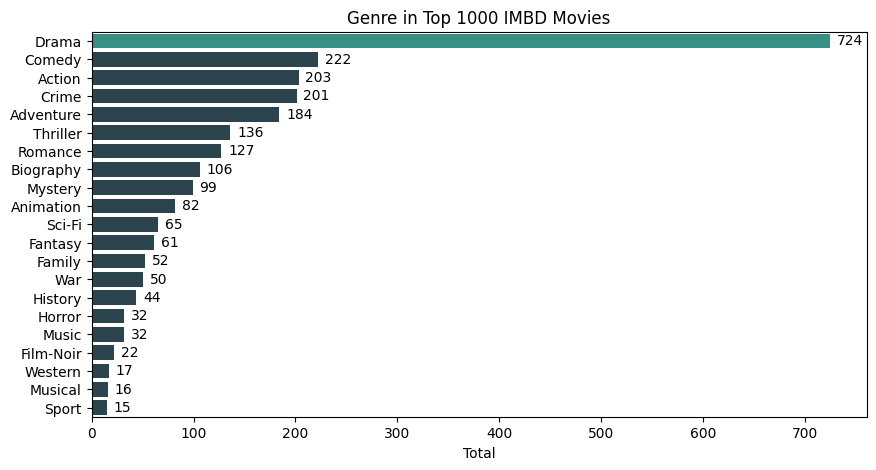

In [30]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = genre_counts.values, y = genre_counts.index, 
                 palette=np.where(genre_counts.values == np.max(genre_counts.values), '#2a9d8f','#264653'))
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlabel('Total')
plt.title('Genre in Top 1000 IMBD Movies')
plt.show()

**Observation**

It can be seen that there are most movies with the genre of **Drama** followed by Comedy, Action, Crime and Adventure.

### Movies with Multiple Genre

In [31]:
multiple_genre = ['Genre'+' '+ str(len(genre)) for genre in df['Genre']]
multiple_genre_counts = pd.Series(multiple_genre).value_counts()
multiple_genre_counts

Genre 3    627
Genre 2    251
Genre 1    107
Name: count, dtype: int64

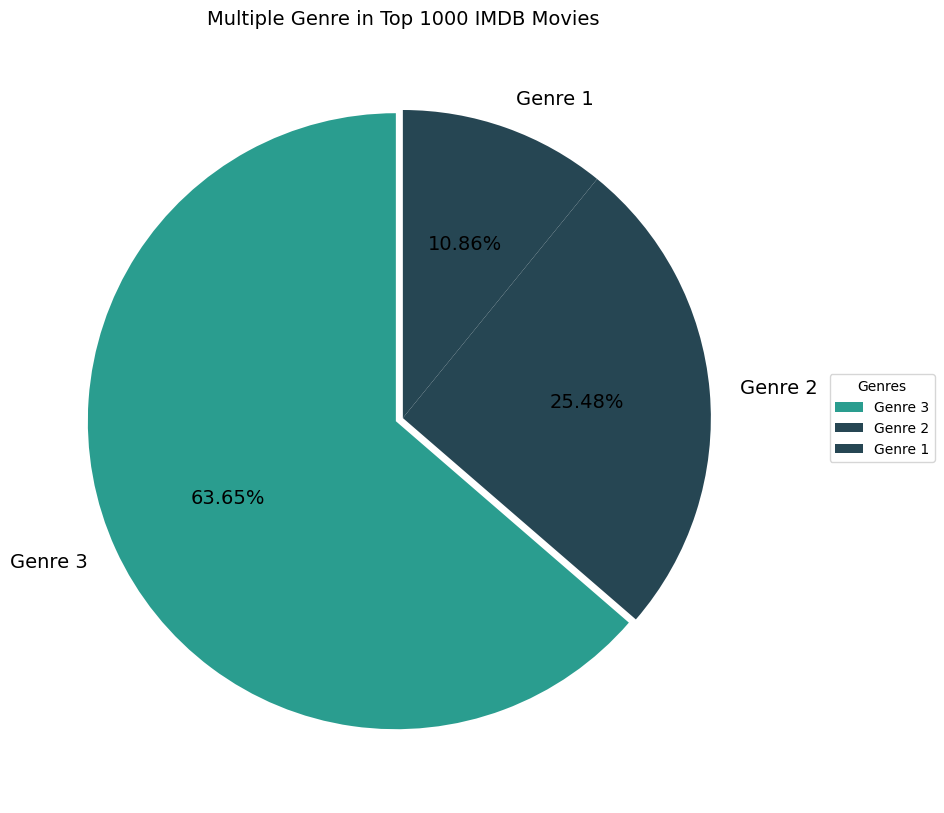

In [32]:
plt.figure(figsize=(10,10))
plt.pie(multiple_genre_counts, autopct='%.2f%%', labels= multiple_genre_counts.index,
       colors = np.where(multiple_genre_counts.values == np.max(multiple_genre_counts.values), '#2a9d8f','#264653'),
       explode=(0.025,0,0), startangle=90, textprops={'fontsize':14})
plt.legend(title = 'Genres', loc = 'right', bbox_to_anchor=(1.2, .5))
plt.title('Multiple Genre in Top 1000 IMDB Movies', fontdict={'fontsize':14})
plt.show()

**Observation**

It can be seen that there are a majority of movies that have a mixture of various genres in the movie.

## Top 10 Directors in Top 1000 IMDB Movies

Since the director column has many unique values, the scope will be narrowed down to the top 10 directors.

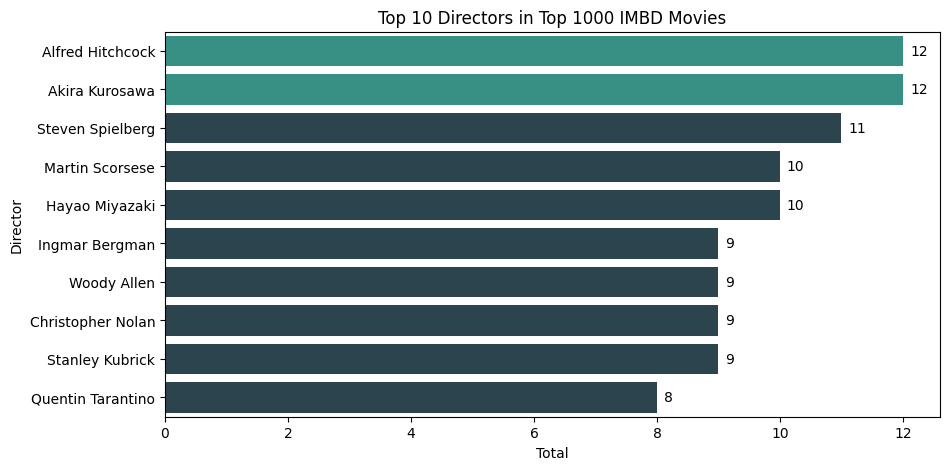

In [33]:
plt.figure(figsize=(10,5))
director = df['Director'].value_counts().head(10)
ax = sns.barplot(x = director.values, y = director.index, 
                 palette=np.where(director.values == np.max(director.values), '#2a9d8f','#264653'))
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlabel('Total')
plt.title('Top 10 Directors in Top 1000 IMBD Movies')
plt.show()

**Observation**

It can be seen that the Top Directors in IMBD's 1000 Movies are **Alfred Hitchcock** and Akira Kurowasa then Steven Spielberg, Martin Scorsese and Hayao Miyazaki

## Top 10 Star Casts in Top 1000 IMDB Movies

Since the Stars column has many unique values, the scope will be narrowed down to the top 10 Stars.

In [34]:
all_stars = [stars for sublist in df['Stars'] for stars in sublist]
all_stars_counts = pd.Series(all_stars).value_counts()

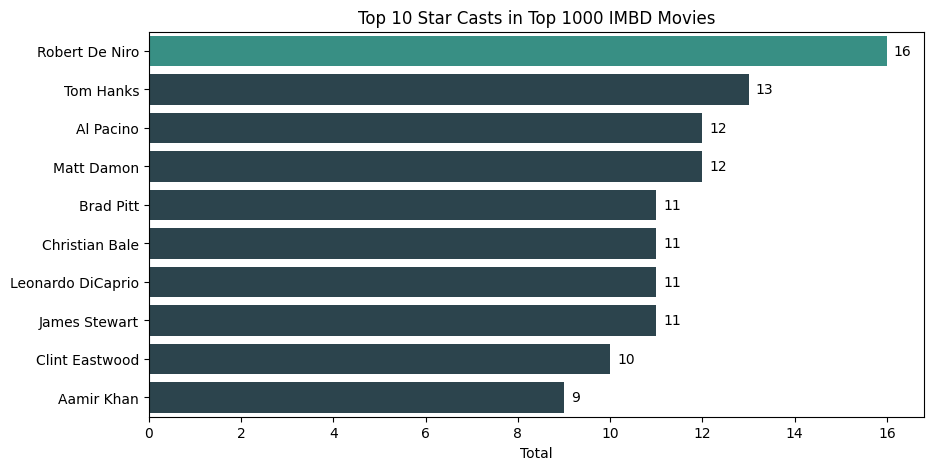

In [35]:
plt.figure(figsize=(10,5))
stars = all_stars_counts.head(10)
ax = sns.barplot(x = stars.values, y = stars.index, 
                 palette=np.where(stars.values == np.max(stars.values), '#2a9d8f','#264653'))
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlabel('Total')
plt.title('Top 10 Star Casts in Top 1000 IMBD Movies')
plt.show()

**Observation**

It can be seen that the Top Stars in IMBD's 1000 Movies is **Robert De Niro** then Tom Hanks, Al Pacino, Matt Damon, Brad Pitt

# Univariate Analysis Numerical Columns

## Distribution Plot Numerical Columns

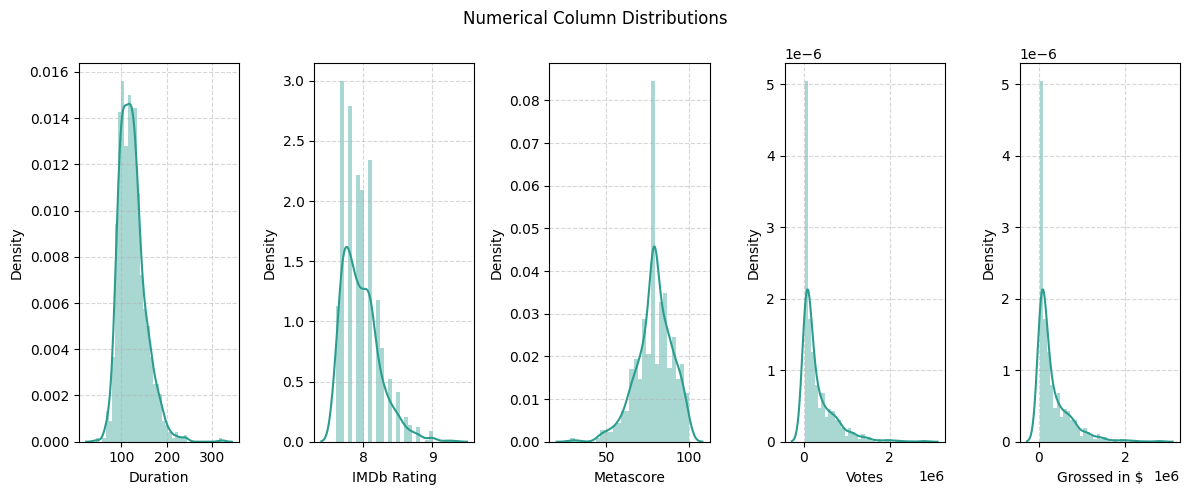

In [36]:
numerical = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(12,5))
for i in range(len(numerical)):
    plt.subplot(1, len(numerical), i + 1)
    sns.distplot(x=df[numerical[i]], color='#2a9d8f')
    plt.grid(True, linestyle='dashed', alpha=0.5)
    plt.xlabel(numerical[i])
plt.suptitle('Numerical Column Distributions')

plt.tight_layout()
plt.show()

**Observation**

1. Duration, IMDb Rating, Metascore have a normal distribution
2. Votes, and Grossed have a distribution skewed to the right (Mean > median)

## Boxplot Numerical Columns

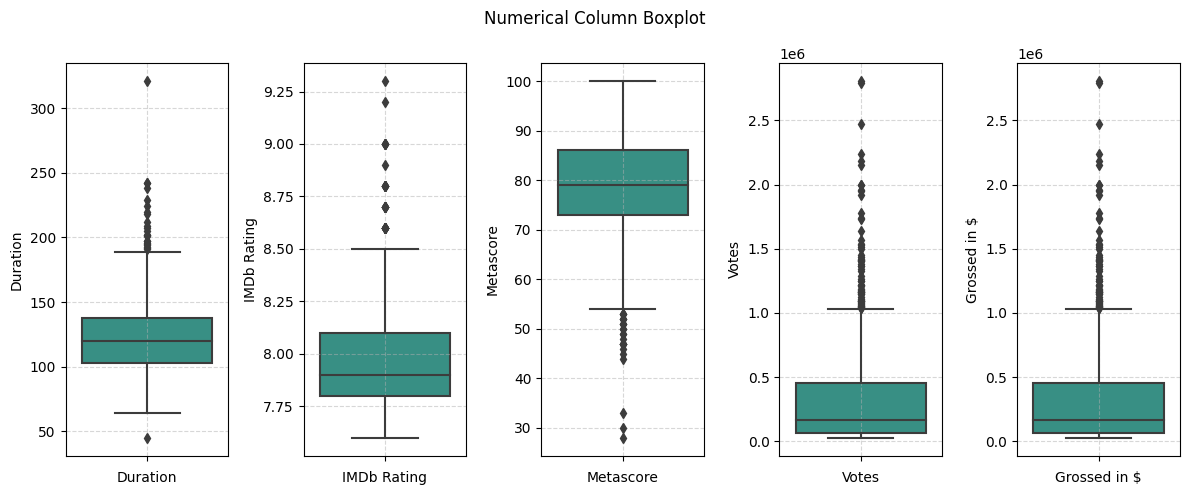

In [37]:
numerical = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(12,5))
for i in range(len(numerical)):
    plt.subplot(1, len(numerical), i + 1)
    sns.boxplot(y=df[numerical[i]], color='#2a9d8f')
    plt.grid(True, linestyle='dashed', alpha=0.5)
    plt.xlabel(numerical[i])
plt.suptitle('Numerical Column Boxplot')

plt.tight_layout()
plt.show()

**Observation**

1. It can be seen that the majority of movie durations are between 100 - 140 minutes.
2. It can be seen that the majority of IMDB Rating movies are between 7.8 - 8.1
3. It can be seen that the majority of movie Metascore is between 73 - 86
4. It can be seen that the majority of movie Votes are between 100000 - 400000
5. It can be seen that the majority of Grossed movies are between 100000 - 400000
6. There are outliers in the numerical data, which is in the Duration column where there is a movie that is more than 300 minutes in duration but after observing these data is normal.

# Bivariate Analysis

## Top 10 Movies with the Longest Movie Duration

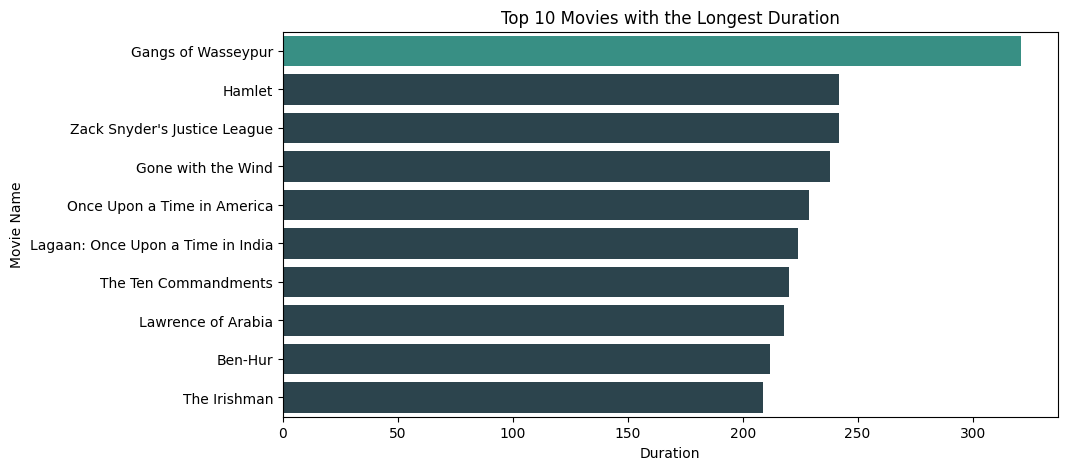

In [38]:
top10_longest = df[['Movie Name','Duration']].sort_values('Duration', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_longest['Duration'], y = top10_longest['Movie Name'], 
                 palette=np.where(top10_longest['Duration'] == np.max(top10_longest['Duration']), '#2a9d8f','#264653'))

plt.title('Top 10 Movies with the Longest Duration')
plt.show()

**Observation**

It can be seen that Movie have longest duration is **Gangs of Wasseypur** then Hamlet, Zack Snyder's Justice League, Gone With The Wind, Once Upon a Time in America

## Top 10 Movies with Highest IMDb Rating

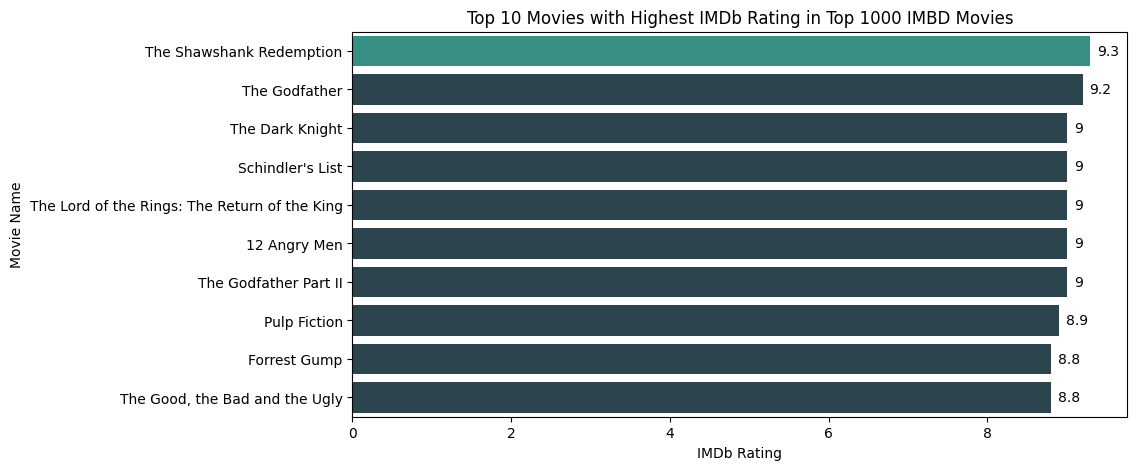

In [39]:
top10_rating = df[['Movie Name','IMDb Rating']].sort_values(by='IMDb Rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_rating['IMDb Rating'], y = top10_rating['Movie Name'], 
                 palette=np.where(top10_rating['IMDb Rating'] == np.max(top10_rating['IMDb Rating']), '#2a9d8f','#264653'))
ax.bar_label(ax.containers[0], padding=5)
plt.title('Top 10 Movies with Highest IMDb Rating in Top 1000 IMBD Movies')
plt.show()

**Observation**

It can be seen that the Top Movie by IMDb Rating in IMBD's 1000 Movies is **The Shawshank Redemption** then The Godfather, The Dark Knight, Schindler List and The Lord of the Rings: The Return of the King

## Top 10 Movies with Highest Metascore

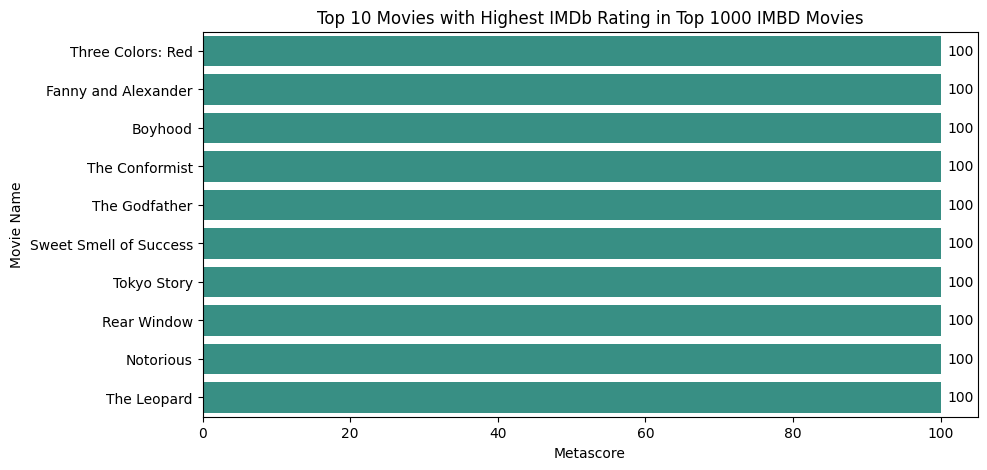

In [40]:
top10_metascore = df[['Movie Name','Metascore']].sort_values(by='Metascore', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_metascore['Metascore'], y = top10_metascore['Movie Name'], 
                 palette=np.where(top10_metascore['Metascore'] == np.max(top10_metascore['Metascore']), '#2a9d8f','#264653'))
ax.bar_label(ax.containers[0], padding=5)
plt.title('Top 10 Movies with Highest IMDb Rating in Top 1000 IMBD Movies')
plt.show()

**Observation**

It can be seen that the Top Movies according to Metascore are equally strong with a rating of 100 including the movie Three Colors: Red to The Leopard

## Top 10 Movies with Highest Votes

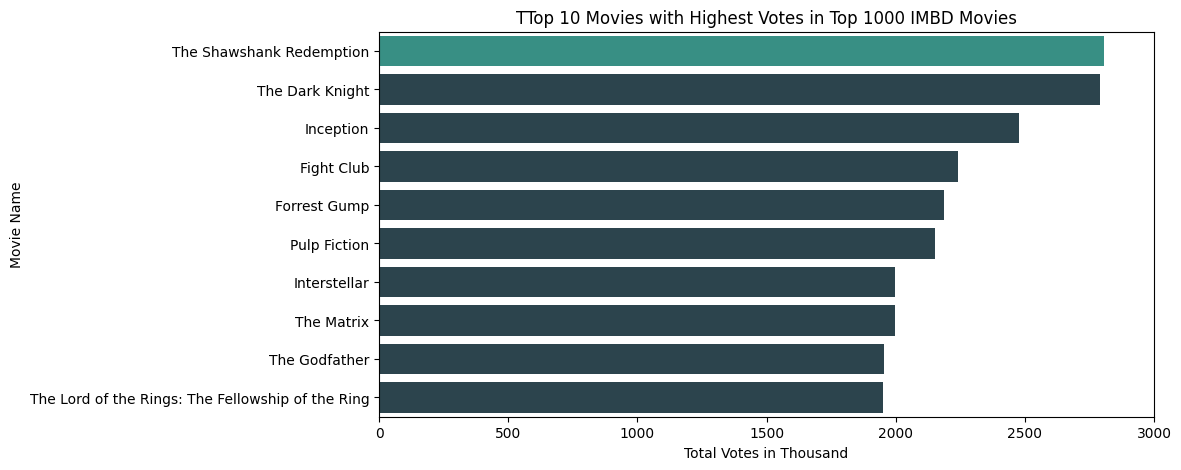

In [41]:
top10_votes = df[['Movie Name','Votes']].sort_values(by='Votes', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_votes['Votes'], y = top10_votes['Movie Name'], 
                 palette=np.where(top10_votes['Votes'] == np.max(top10_votes['Votes']), '#2a9d8f','#264653'))

ax.set_xlabel('Total Votes in Thousand')
labels, location = plt.xticks()
plt.xticks(labels,(labels/1000).astype('int'))
plt.title('TTop 10 Movies with Highest Votes in Top 1000 IMBD Movies')
plt.show()

**Observation**

It can be seen that the Top Movie with Highest Votes in IMBD's 1000 Movies is **The Shawshank Redemption** but it turns out that even the best rating does not always result in high votes because it can be seen that the second highest rated **The Godfather** has a votes that is not higher than **The Matrix, Interstellar and Inception** which were previously not included in the Top 10 highest rated movies.

## Top 10 Movies with Highest Grossed

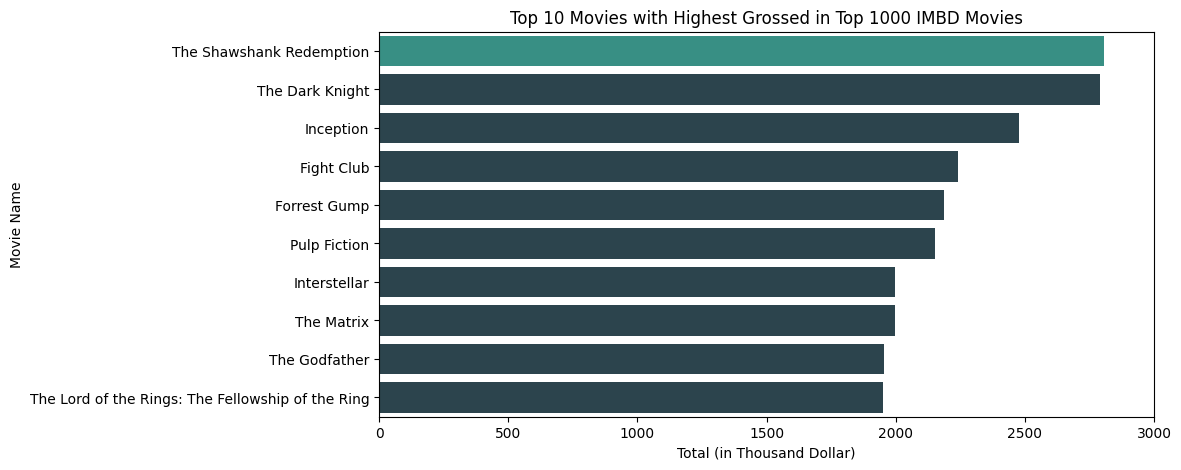

In [42]:
top10_gross = df[['Movie Name','Grossed in $']].sort_values(by='Grossed in $', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_gross['Grossed in $'], y = top10_gross['Movie Name'], 
                 palette=np.where(top10_gross['Grossed in $'] == np.max(top10_gross['Grossed in $']), '#2a9d8f','#264653'))

ax.set_xlabel('Total (in Thousand Dollar)')
labels, location = plt.xticks()
plt.xticks(labels,(labels/1000).astype('int'))
plt.title('Top 10 Movies with Highest Grossed in Top 1000 IMBD Movies')
plt.show()

**Observation**

It can be seen that the Top Movie with Highest Grossed Revenue in IMBD's 1000 Movies is **The Shawshank Redemption** but it turns out that even the best rating does not always result in high Grossed Revenue because it can be seen that the second highest rated **The Godfather** has a Grossed Revenue that is not higher than **The Matrix, Interstellar and Inception** which were previously not included in the Top 10 highest rated movies. It can also be seen that **Schindler's List and 12 Angry Men** are not included at all in the Top 10 Movies with the highest Grossed Revenue.

# Multivariate Analysis

## Heatmap Correlation in Numerical Columns

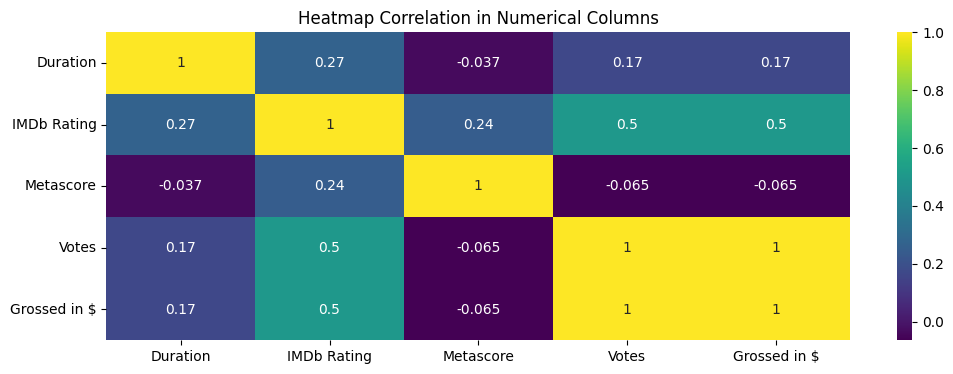

In [43]:
corr = df[numerical].corr()
plt.figure(figsize=(12,4))
sns.heatmap(corr, annot= True,cmap='viridis')
plt.title('Heatmap Correlation in Numerical Columns')
plt.show()

**Observation**

1. There is a strong correlation between IMDB Rating with Votes and Grossed in dollars, it can be concluded that the higher the rating, the more votes are given and the higher the grossed revenue obtained.
2. A strong correlation is also found in Votes and Grossed in dollars, it could be that the information contained is redundant information.

## Scatterplot Grossed Vs IMDb Rating

In [44]:
df_scatter = df.copy()
df_scatter['Multiple_genre'] = df['Genre'].apply(lambda x: str(len(x)) + ' Genre' )

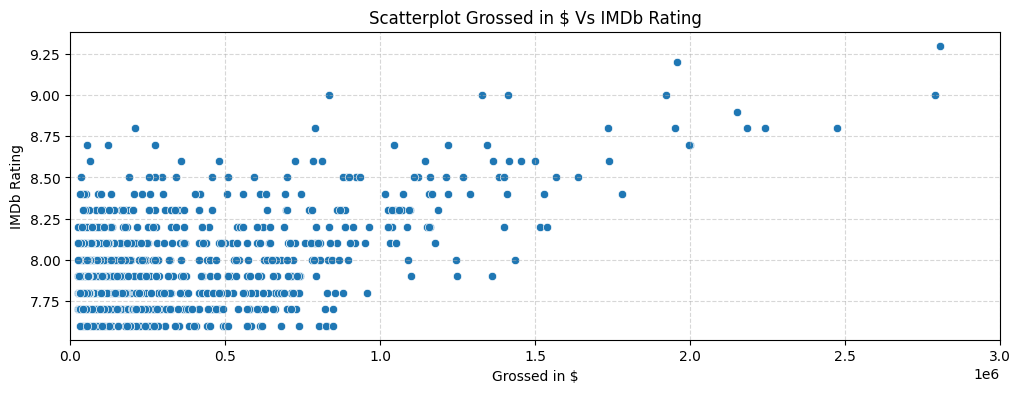

In [45]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df_scatter, x='Grossed in $', y='IMDb Rating')
plt.grid(True, alpha=0.5, linestyle='dashed')
plt.xlim(0,3000000)
plt.title('Scatterplot Grossed in $ Vs IMDb Rating')
plt.show()

**Observation**

It can be seen the highest rating affects the high Grossed Revenue and it can be seen that the average IMDb Rating below 8 has a small Grossed Revenue.

## Scatterplot Grossed Vs Metascore

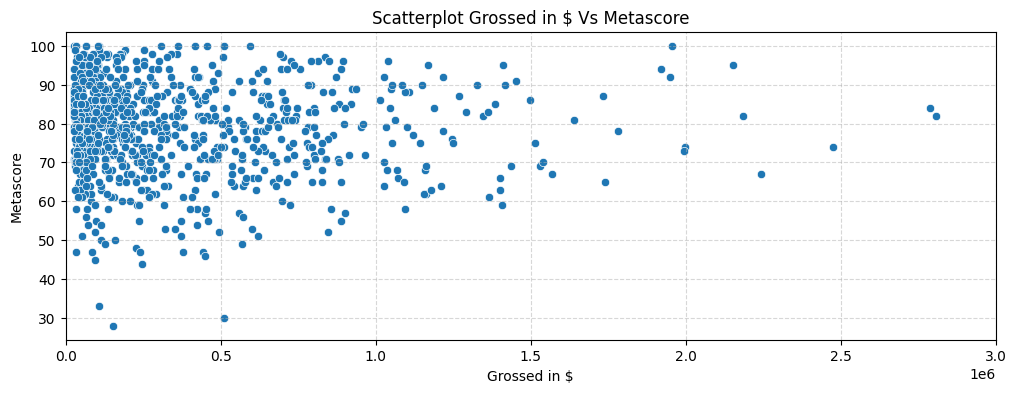

In [46]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df_scatter, x='Grossed in $', y='Metascore')
plt.grid(True, alpha=0.5, linestyle='dashed')
plt.xlim(0,3000000)
plt.title('Scatterplot Grossed in $ Vs Metascore')
plt.show()

**Observation**

It can be seen that the highest Metascore does not affect the high Grossed Revenue and it can be seen that even the most maximal Metascore still gets a small Grossed Revenue. It can be concluded that Grossed Revenue is not affected by Metascore

## Scatterplot Multiple Genre Vs IMDb Rating and Metascore

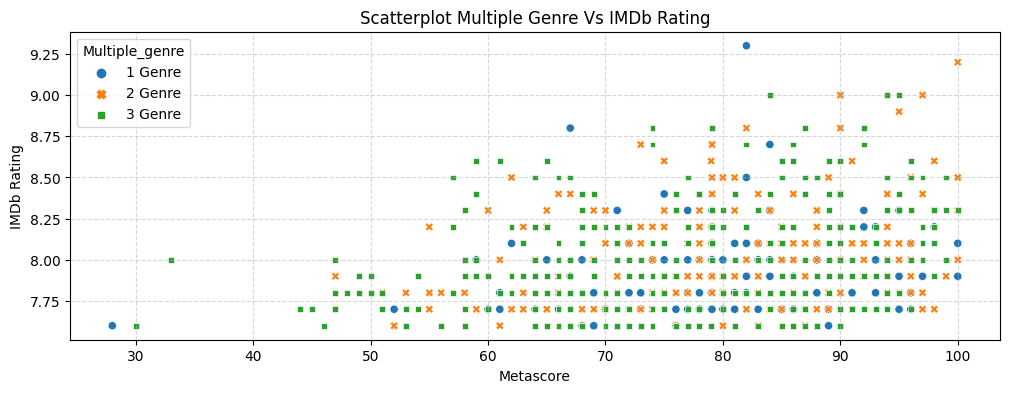

In [47]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df_scatter, y='IMDb Rating', hue='Multiple_genre', x='Metascore', style='Multiple_genre')
plt.grid(True, alpha=0.5, linestyle='dashed')
plt.title('Scatterplot Multiple Genre Vs IMDb Rating')
plt.show()

**Observation**

It can be seen that even the highest rating on IMDb rating is not always high Metascore value, this can be seen in IMDb Rating 9.25 but the Metascore is only about 83. But the small Metascore value is also in line with the small IMDb rating value.

## Pairplot

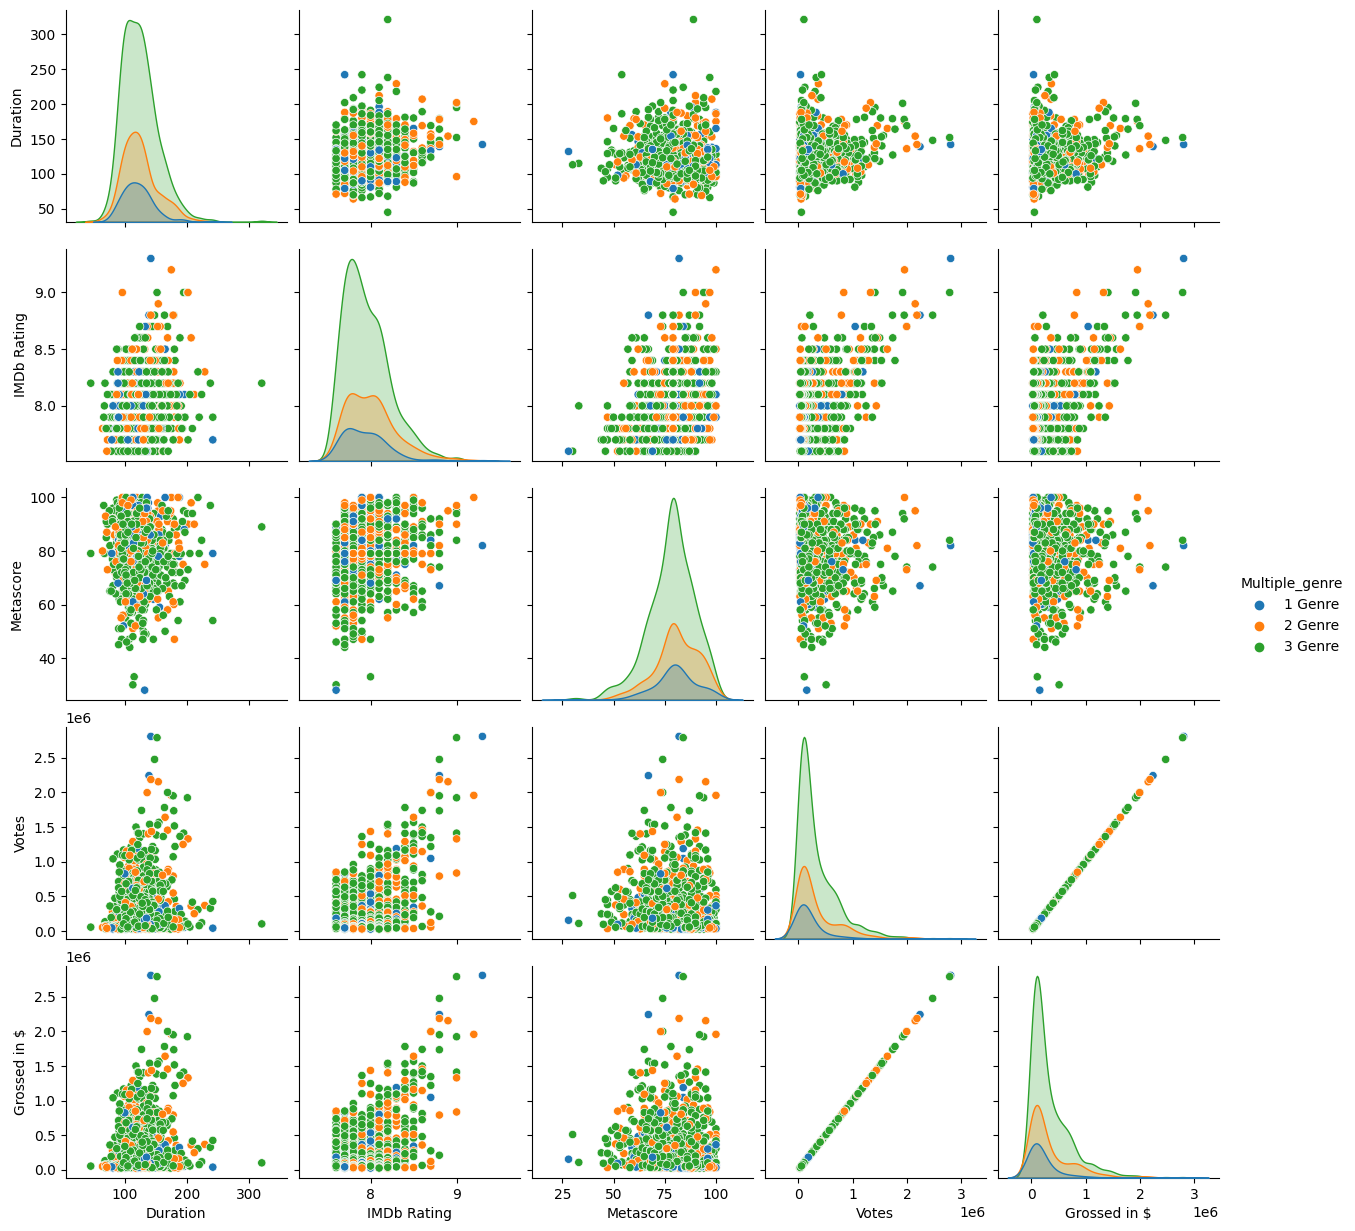

In [48]:
sns.pairplot(df_scatter, hue='Multiple_genre')
plt.show()

**Observation**

1. It can be seen that the movie is dominated by multiple genres, which means that in 1 movie there are 3 types of genres
2. With the higher the IMDb rating value, the higher the Grossed value of the movie obtained and the higher the Votes obtained in the movie.

# Deep Dive Analysis

## Top 10 Directors who earned the highest Grossed Revenue from their movies

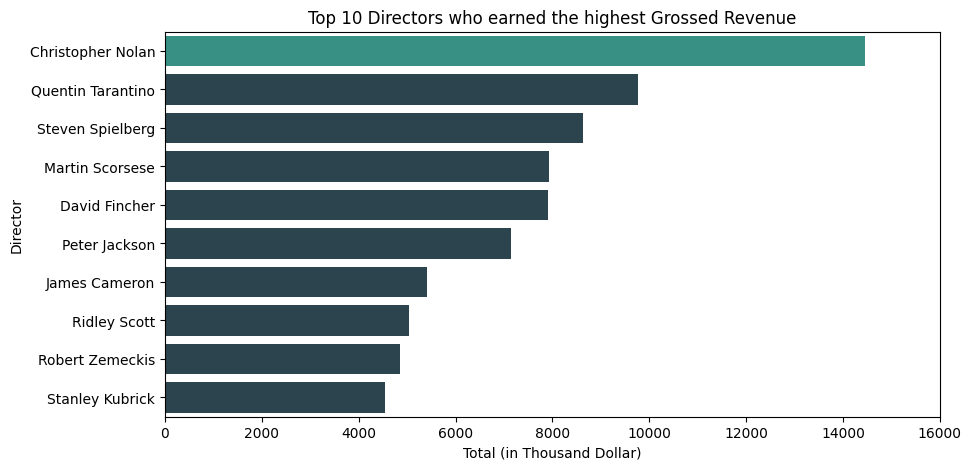

In [49]:
top10_gross = df[['Director','Grossed in $']].groupby('Director').agg(sum_grossed = ('Grossed in $','sum'))
top10_gross = top10_gross.reset_index().sort_values('sum_grossed',ascending=False).head(10)
top10_gross


plt.figure(figsize=(10,5))
stars = all_stars_counts.head(10)
ax = sns.barplot(x = top10_gross['sum_grossed'], y = top10_gross['Director'], 
                 palette=np.where(top10_gross['sum_grossed'] == np.max(top10_gross['sum_grossed']), '#2a9d8f','#264653'))

ax.set_xlabel('Total (in Thousand Dollar)')
labels, location = plt.xticks()
plt.xticks(labels, (labels/1000).astype('int'))
plt.title('Top 10 Directors who earned the highest Grossed Revenue')
plt.show()

**Observation**

It can be seen that Director who earned Highest Grossed Revenue from their movie is **Christopher Nolan** then Quentin Tarantino, Steven Spielberg, Martin Scorsese and David Fincher

## What movie has contributed the most to Director Christopher Nolan Earnings

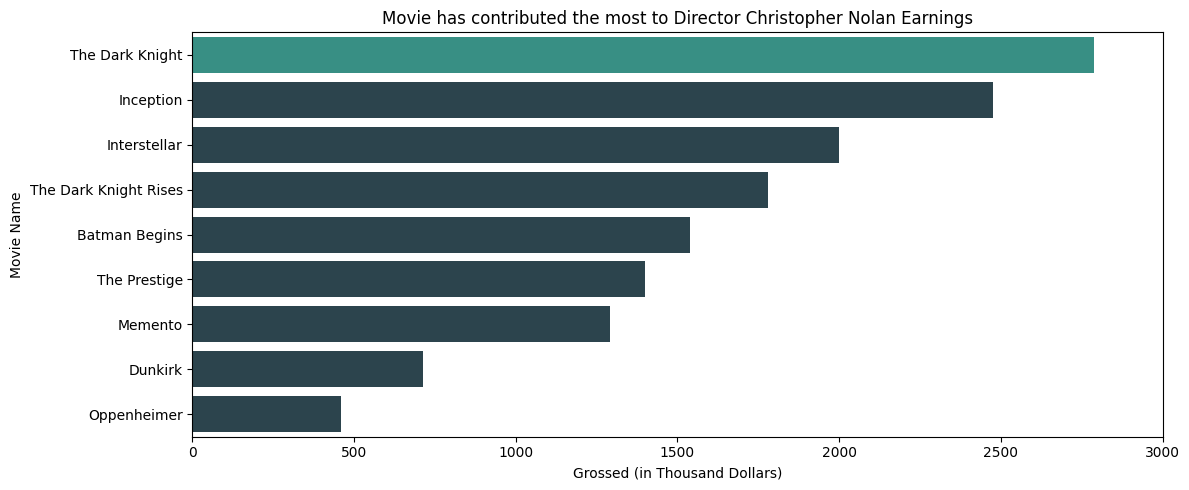

In [50]:
condition = df['Director'].str.contains('Nolan')
director = df[['Movie Name','Director','Grossed in $']].sort_values('Grossed in $', ascending=False)
director = director[condition]


plt.figure(figsize=(12,5))
sns.barplot(data = director, x = 'Grossed in $', y='Movie Name', 
            palette=np.where(director['Grossed in $'] == np.max(director['Grossed in $']), '#2a9d8f','#264653'))
plt.title('Movie has contributed the most to Director Christopher Nolan Earnings')
labels, location = plt.xticks()
plt.xticks(labels, (labels/1000).astype('int'))
plt.xlabel('Grossed (in Thousand Dollars)')
plt.tight_layout()
plt.show()

**Observation**

It can be seen that the films that contribute the most to Director Christopher Nolan's Grossed Revenue is The Dark Knight then Inception, Interstellar, The Dark Knight Rises and Batman Begins. It can also be seen that the sequel to Batman or The Dark Knight is the highest or main contribution to Grossed Revenue.

## Bottom 10 Movie Rating in Top 1000 IMDb Movies

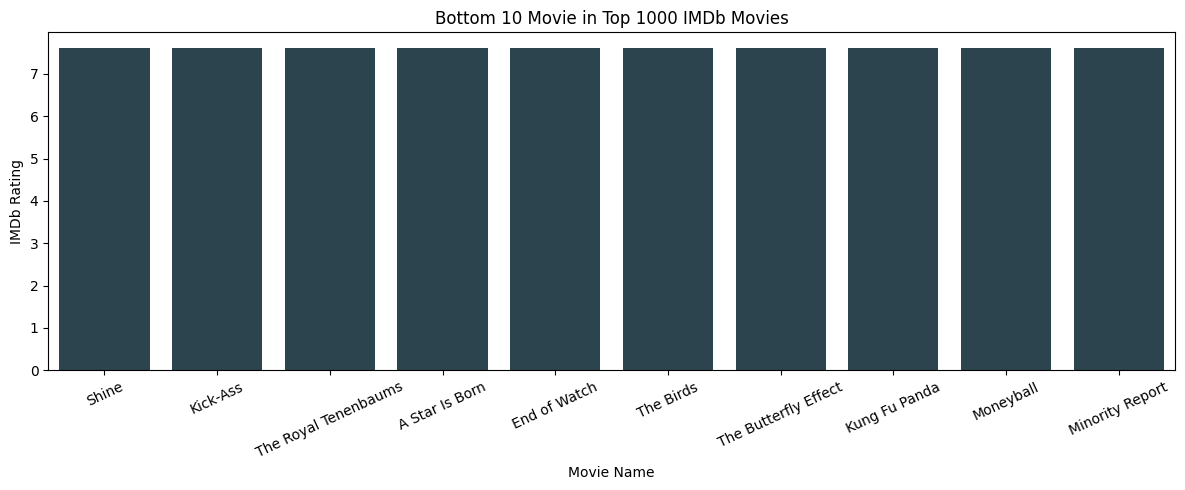

In [51]:
condition = df['IMDb Rating'] < np.mean(df['IMDb Rating'])
bottom10_rating = df[['Movie Name', 'IMDb Rating']].sort_values('IMDb Rating', ascending= True).head(10)
bottom10_rating = bottom10_rating[condition]
bottom10_rating

plt.figure(figsize=(12,5))
sns.barplot(data = bottom10_rating, x = 'Movie Name', y='IMDb Rating', 
            palette=np.where(bottom10_rating['IMDb Rating'] < np.mean(bottom10_rating['IMDb Rating']), '#2a9d8f','#264653'))
plt.title('Bottom 10 Movie in Top 1000 IMDb Movies')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

**Observation**

It can be seen that movies with IMDb ratings that are below the IMDb Rating in the Top 1000 IMDb Movies have the same rating value

## Bottom 10 Directors who earned the lowest Grossed Revenue from their movies

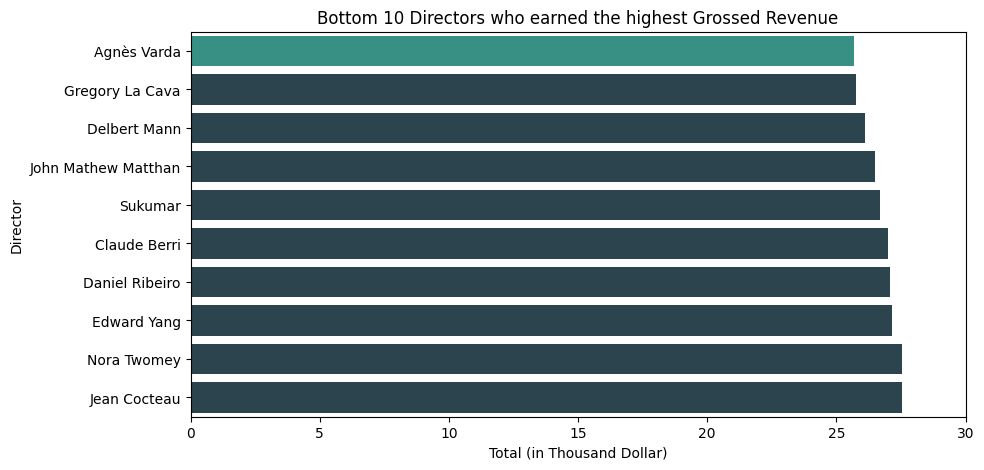

In [52]:
bottom10_gross = df[['Director','Grossed in $']].groupby('Director').agg(sum_grossed = ('Grossed in $','sum'))
bottom10_gross = bottom10_gross.reset_index().sort_values('sum_grossed',ascending=True).head(10)
bottom10_gross


plt.figure(figsize=(10,5))
stars = all_stars_counts.head(10)
ax = sns.barplot(x = bottom10_gross['sum_grossed'], y = bottom10_gross['Director'], 
                 palette=np.where(bottom10_gross['sum_grossed'] == np.min(bottom10_gross['sum_grossed']), '#2a9d8f','#264653'))

ax.set_xlabel('Total (in Thousand Dollar)')
labels, location = plt.xticks()
plt.xticks(labels, (labels/1000).astype('int'))
plt.title('Bottom 10 Directors who earned the highest Grossed Revenue')
plt.show()

**Observation**

It can be seen that Director who earned Lowest Grossed Revenue from their movie is Agnes Varda then Gregory La Cava, Delbert Mann, John Mathew Matthan and Sukumar

## Most Common Words in Movies Plot

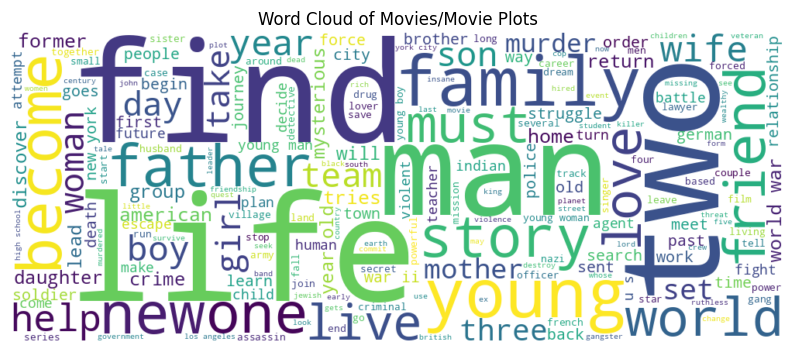

In [53]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
all_plot = ' '.join(df['Plot'].dropna())

stopwords = set(STOPWORDS)
processed_text = ' '.join([word.lower() for word in all_plot.split() if word.lower() not in stopwords])
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Movies/Movie Plots')
plt.show()

**Observation**

It can be seen that every movie mostly contains the words **"Life, Find, Man, Two, Family and Young"**. Maybe these words are found in the Drama genre, therefore it must be further analyzed the words on the plot in the drama genre where the Drama Genre is the most popular movie in the Top 1000 IMDb Rating.

# Conclusion EDA

Dataset contains information about top 1000 IMDB movies, including their titles, certificates, durations, genres, IMDb ratings, Metascores, directors, cast members, the number of votes they received, grossed earnings, and plot summaries. The data is a curated list of highly acclaimed and popular movies

1. There are missing values in the dataset, in the columns Metascore and Certificate by a total of 158 or 15.8% and no Duplicate Data
2. In the Genre column there are several values and in 1 movie there are multiple genres
3. There are special character strings and multiple value in Stars column, so here we separate them into a list so that we can see in which Stars the movie appears the most
4. It can be seen that there are most movies with the genre of **Drama** and **'R' (Rated)** certificate also majority of movies that have a mixture of various genres in the movie.
5. Duration, IMDb Rating, Metascore have a normal distribution while Votes, and Grossed have a distribution skewed to the right (Mean > median)
6. There are outliers in the numerical data, which is in the Duration column where there is a movie that is more than 300 minutes in duration but after observing these data is normal.
7. There is a strong correlation between IMDB Rating with Votes and Grossed in dollars, it can be concluded that the higher the rating, the more votes are given and the higher the grossed revenue obtained. A strong correlation is also found in Votes and Grossed in dollars, it could be that the information contained is redundant information.
8. After analysis the highest Metascore does not affect the high Grossed Revenue and it can be seen that even the most maximal Metascore still gets a small Grossed Revenue. It can be concluded that Grossed Revenue is not affected by Metascore
9. Majority of movie durations are between 100 - 140 minutes.
10. The movie is dominated by multiple genres, which means that in 1 movie there are 3 types of genres 
11. The movie have longest duration is **Gangs of Wasseypur** then **Hamlet, Zack Snyder's Justice League, Gone With The Wind, Once Upon a Time in America**
12. The Top Movie by IMDb Rating in IMBD's 1000 Movies is **The Shawshank Redemption** then **The Godfather, The Dark Knight, Schindler List** and **The Lord of the Rings: The Return of the King** but it turns out that even the best rating does not always result in high Grossed Revenue because it can be seen that the second highest rated **The Godfather** has a Grossed Revenue that is not higher than **The Matrix, Interstellar** and **Inception** which were previously not included in the Top 10 highest rated movies. It can also be seen that **Schindler's List** and **12 Angry Men** are not included at all in the Top 10 Movies with the highest Grossed Revenue.
13. Top Movies according to Metascore are equally strong with a rating of 100 including the movie **Three Colors: Red to The Leopard**
14. The Top Stars in IMBD's 1000 Movies is **Robert De Niro** then **Tom Hanks, Al Pacino, Matt Damon, Brad Pitt**
15. The Top Directors in IMBD's 1000 Movies are **Alfred Hitchcock and Akira Kurowasa** but the director who earned Highest Grossed Revenue from their movie is **Christopher Nolan**
16. After analyzing the movies that contributed the most to Director Christopher Nolan's Grossed Revenue, it turns out the movies that have the highest Grossed Revenue are **The Dark Knight** then **Inception, Interstellar, The Dark Knight Rises** and **Batman Begins**. It can also be seen that the **Batman sequel or The Dark Knight** is the highest or main contribution to Christopher Nolan's Grossed Revenue.
17. Every movie mostly contains the words **"Life, Find, Man, Two, Family and Young"**. Maybe these words are found in the Drama genre, therefore it must be further analyzed the words on the plot in the drama genre where the Drama Genre is the most popular movie in the Top 1000 IMDb Rating.